- Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
  - Salary
    - Those who earn high end to stay
  - Promotion
    - Those who are promoted tend to stay as they are a very ones who left after being promoted for the last 5 years
- Plot bar charts showing impact of `employee salaries` on retention
- Plot bar charts showing corelation between `department` and `employee retention`
- Now build `logistic regression model` using variables that were narrowed down in step 1
- Measure the accuracy of the model

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [63]:
df = pd.read_csv('HR_comma_sep.csv')

In [64]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [66]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [76]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [ ]:
df[(df['left'] == 1) & (df['salary'] == 'high')]['Department'].value_counts()

Department
technical      25
sales          14
marketing       9
support         8
hr              6
product_mng     6
accounting      5
IT              4
RandD           4
management      1
Name: count, dtype: int64

In [88]:
df[(df['left'] == 1) & (df['salary'] == 'medium')]['Department'].value_counts()

Department
sales          303
technical      294
support        158
hr             117
accounting     100
IT              97
product_mng     87
marketing       68
RandD           62
management      31
Name: count, dtype: int64

In [89]:
df[(df['left'] == 1) & (df['salary'] == 'low')]['Department'].value_counts()

Department
sales          697
support        389
technical      378
IT             172
marketing      126
product_mng    105
accounting      99
hr              92
management      59
RandD           55
Name: count, dtype: int64

In [91]:
df[df['salary'] == 'high']['satisfaction_level'].describe()

count    1237.000000
mean        0.637470
std         0.226791
min         0.090000
25%         0.500000
50%         0.660000
75%         0.810000
max         1.000000
Name: satisfaction_level, dtype: float64

In [94]:
df[(df['salary'] == 'high') & (df['satisfaction_level'] >= .6) & (df['left'] == 1)]['Department'].value_counts()

Department
technical    8
sales        5
support      3
IT           2
Name: count, dtype: int64

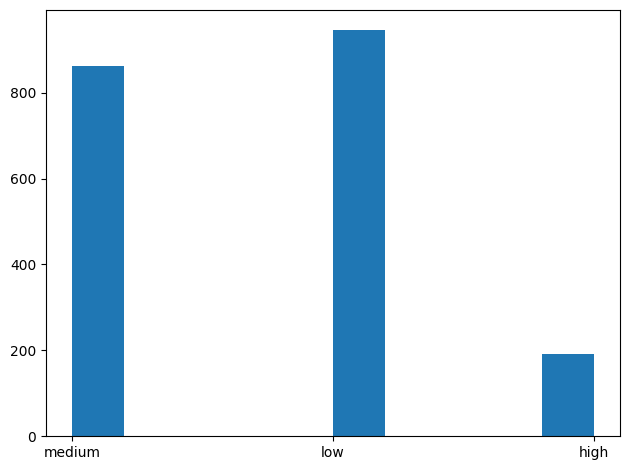

In [113]:
plt.hist(df[(df['Work_accident'] == 1) & (df['left'] == 0)]['salary'])
plt.tight_layout()

In [122]:
df['average_montly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

<BarContainer object of 14999 artists>

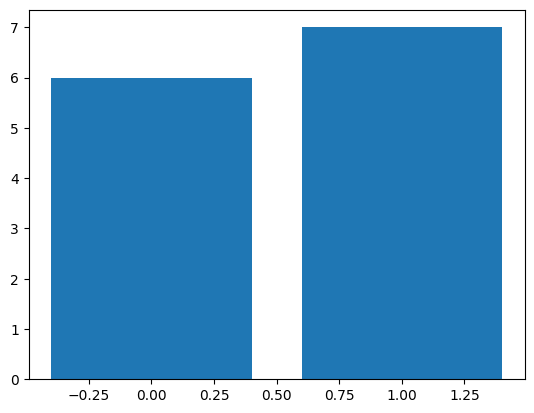

In [128]:
plt.bar(df['left'], df['number_project'])

In [121]:
df[(df['average_montly_hours'] > 201)]['Department'].value_counts()

Department
sales          2061
technical      1356
support        1093
IT              597
product_mng     441
marketing       415
RandD           379
accounting      375
hr              352
management      320
Name: count, dtype: int64

In [68]:
df.sort_values(by='satisfaction_level').tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
10906,1.0,0.73,5,189,3,1,0,0,product_mng,low
10324,1.0,0.83,4,280,4,1,0,0,sales,low
10900,1.0,0.79,5,171,5,0,0,0,IT,medium
5938,1.0,0.59,5,182,3,1,0,0,management,medium
4078,1.0,0.85,3,202,2,0,0,0,hr,medium


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [70]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [71]:
df[(df['Work_accident'] == 1)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
18,0.45,0.51,2,160,3,1,1,1,sales,low
68,0.76,0.86,5,223,5,1,1,0,product_mng,medium
120,0.14,0.62,4,158,4,1,1,0,technical,low
123,0.11,0.84,6,300,5,1,1,0,support,low
136,0.10,0.84,6,283,4,1,1,0,technical,low
...,...,...,...,...,...,...,...,...,...,...
14940,0.10,0.78,5,285,4,1,1,0,RandD,medium
14945,0.14,0.75,4,277,5,1,1,0,sales,medium
14949,0.42,0.57,2,147,3,1,1,0,management,low
14989,0.43,0.57,2,159,3,1,1,0,technical,low


In [72]:
work_acc_and_left = df[(df['Work_accident'] == 1) & (df['left'] == 1)]

In [73]:
df[df['left'] == 1]['Department'].value_counts()

Department
sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: count, dtype: int64

In [74]:
work_acc_and_left['Department'].value_counts()

Department
sales          46
technical      33
support        31
marketing      10
RandD          10
product_mng     9
accounting      9
IT              9
hr              7
management      5
Name: count, dtype: int64

In [75]:
work_acc_and_left.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.0,169.0,169.000000
mean,0.447041,0.716450,3.786982,204.934911,3.899408,1.0,1.0,0.023669
std,0.273593,0.197533,1.708402,58.825422,0.961429,0.0,0.0,0.152466
min,0.090000,0.450000,2.000000,127.000000,2.000000,1.0,1.0,0.000000
25%,0.140000,0.520000,2.000000,149.000000,3.000000,1.0,1.0,0.000000
50%,0.410000,0.790000,4.000000,219.000000,4.000000,1.0,1.0,0.000000
75%,0.750000,0.880000,5.000000,258.000000,5.000000,1.0,1.0,0.000000
max,0.920000,1.000000,7.000000,309.000000,6.000000,1.0,1.0,1.000000
